### Read in the data set

In [97]:
import pandas as pd

### setting the number of columns to display to 30
pd.options.display.max_columns=30

cols = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars = pd.read_csv("imports-85.data", header=None, names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We can use all the numeric columns as features where the price column is our target column to make predictions. 

Also, we can't have missing values if we want to use them for predictive modeling. We can tell that the `normalized-losses` column contains missing values represented using `"?"`. 

So we can:

* Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
  * continuous values: `["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]`
* Replace `'missing'` values and look for the presence of missing values in other numeric columns
* Normalize the values in all numeric columns

### Data cleaning

In [98]:
cont_values = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
numeric_cars = cars[cont_values]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [99]:
import numpy as np
numeric_cars = numeric_cars.replace("?",np.nan)
numeric_cars.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [100]:
### let's see which columns need to be converted as numeric
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [101]:
numeric_cars = numeric_cars.astype(float)

### let's count how many nan values we have
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [102]:
### because 'price' is the column we want to predict, let's remove rows with missing values
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [103]:
### replace the missing values using the average values from that column
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [104]:
### normalize columns except 'price'
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariate K-Nearest Neighbors

In [145]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

def knn_train_test(train, target, df):
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mse_values = cross_val_score(knn, df[[train]], df[target], scoring='neg_mean_squared_error', cv=kf)
    avg_rmse = np.mean(abs(mse_values)**.5)
    return avg_rmse

rmses = dict()
cols = list(numeric_cars.columns)
cols.remove('price')


for col in cols:
    rmses[col] = knn_train_test(col, 'price', numeric_cars)
    
### Create a Series object from the dictionary so 
### we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmses)
rmse_results_series.sort_values()

horsepower           3983.289877
curb-weight          4130.915690
highway-mpg          4336.427993
width                4480.755962
city-mpg             4788.022045
length               5645.803155
wheel-base           5709.567683
bore                 6561.161516
compression-ratio    6875.609561
normalized-losses    7482.632289
peak-rpm             7721.986452
height               7735.811797
stroke               7768.258096
dtype: float64

In [148]:
from sklearn.metrics import mean_squared_error

def knn_train_test(train, target, df):
    
    ### shuffle the data set
    np.random.seed(2)
    #df = df.loc[np.random.permutation(len(df))]
    #shuffled_index = np.random.permutation(df.index)
    #df = df.reindex(shuffled_index)
    df = df.loc[np.random.permutation(df.index)]
    
    ### split the data set 
    split_row = int(len(df)/2)
    train_df = df.iloc[0:split_row]
    test_df = df.iloc[split_row:]
    
    k_values = list(range(1,10,2))
    k_rmse_values = dict()
    
    for k in k_values:
        ### create a model, fit it and make predictions
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train]],train_df[target])
        labels = knn.predict(test_df[[train]])
        
        ### calculating rmse
        mse = mean_squared_error(test_df[target], labels)
        rmse = mse**.5
        k_rmse_values[k] = rmse
    
    return k_rmse_values

rmse_results = dict()
cols = numeric_cars.columns.drop('price')
for col in cols:
    rmse_values = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_values

rmse_results

{'bore': {1: 7702.0597823627095,
  3: 6737.1662302544837,
  5: 7179.2651007282539,
  7: 7181.4506052971274,
  9: 6988.9723045125083},
 'city-mpg': {1: 6098.0185314494565,
  3: 5925.1320523920667,
  5: 5371.9940682862789,
  7: 5274.7190961741417,
  9: 5242.2499595177451},
 'compression-ratio': {1: 7020.5923891826615,
  3: 7032.2027568793392,
  5: 7052.3671165737451,
  7: 7552.6743948250087,
  9: 8189.120228837568},
 'curb-weight': {1: 5320.1507627710944,
  3: 4456.515695609578,
  5: 4423.5675528081883,
  7: 4566.2339383205717,
  9: 4913.2342990861589},
 'height': {1: 8779.2884119273567,
  3: 8682.607261346413,
  5: 8636.8624588028051,
  7: 8537.3025789123712,
  9: 8603.6723884927414},
 'highway-mpg': {1: 5361.092762111135,
  3: 4317.072878933619,
  5: 4524.912704108443,
  7: 4753.845965991899,
  9: 5211.6230800577505},
 'horsepower': {1: 5694.6165284363615,
  3: 4656.4583512942254,
  5: 4690.4399577045742,
  7: 4830.384783032503,
  9: 5158.4519675128095},
 'length': {1: 5451.51413974517

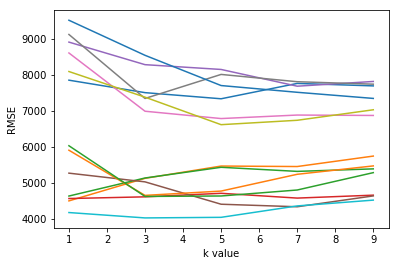

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 1
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.show()

### Multivariate model

In [162]:
# Compute average RMSE across different `k` values for each feature
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg

series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [187]:
### the function will predict using multiple columns as training set
def knn_train_test(train, target, df):
    
    ### shuffle the data set
    np.random.seed(2)
    df = df.loc[np.random.permutation(df.index)]
    
    ### split the data set 
    split_row = int(len(df)/2)
    train_df = df.iloc[0:split_row]
    test_df = df.iloc[split_row:]
    
    k_value = 5
    k_rmse_values = dict()
    
    ### create a model, fit it and make predictions
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_df[train],train_df[target])
    labels = knn.predict(test_df[train])
    
    ### calculating rmse
    mse = mean_squared_error(test_df[target], labels)
    rmse = mse**.5
    k_rmse_values[k_value] = rmse
    
    return k_rmse_values

k_rmse_results = {}

two_best_features = list(series_avg_rmse.sort_values().index[0:2])
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = list(series_avg_rmse.sort_values().index[0:3])
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = list(series_avg_rmse.sort_values().index[0:4])
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = list(series_avg_rmse.sort_values().index[0:5])
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {5: 4613.6789035378797},
 'four best features': {5: 4204.0267995679042},
 'three best features': {5: 4024.2731871423039},
 'two best features': {5: 4250.4724264858878}}

In [189]:
### the function will predict using multiple k values, from 1 to 24
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

k_rmse_results

{'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.0298450889268,
  15: 4444.1644076771327,
  16: 4492.0698685717889,
  17: 4597.2622226920339,
  18: 4615.4463167683252,
  19: 4692.5688728042505,
  20: 4727.8159851123819,
  21: 4738.2330676528691,
  22: 4778.1766872314656,
  23: 4811.5567989100728,
  24: 4846.5485297899286},
 'three best features': {1: 3013.0109985241875,
  2: 2813.2859698259972,
  3: 3171.5852844786741,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.5068489003761,
  7: 3774.3772094554106,
  8: 3978.9691240211159,
  9: 3992.9236805888809,
  10: 4076.2381473803043,
  11: 4156.3883311318068,
  12: 4201.1071338594802,
  13: 4303.6267686132496,
  14: 4359

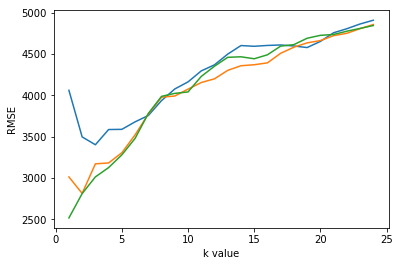

In [190]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.show()

For each model, the optimal k value is:
* `k=1` using the 4 best features
* `k=2` using the 3 best features
* `k=3` using the 2 best features

This means our learning algorithm is assuming that few features relate to a car's price, such as ```"horsepower, width, curb-weight, highway-mpg"```. 

It also means that there is high variance between the data, so if we use a higher k value, then we get a higher distance and hence a higher error. 